# Using Gradient Descent to Find Least Squares Linear Regression Line on Iris Setosa Data points
### with Python

In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [5]:
# Reading in the iris data into a dataframe
iris = pd.read_csv('iris_data.csv')
iris = iris[iris['Species']=='setosa']
# Putting the data we want into a dataframe called 'data'
data = iris[['SepalLength', 'SepalWidth']]

data.head(3)

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [32]:
def loss_function(input_vec, output, weight_vec):
    """
    Function to take in an input DataFrame, an output array, and
    weight vector and returns the sum of squared residuals
    INPUTS:
        - input_vec, an array of length n that contains all the input data
        - output, an array of length n that contains all the outputs
        - weight_vec, an array with 2 elements, the slope and the intercept
    OUTPUTS:
        - total_loss, the sum of squared residuals, a scalar float value
    """
    n = len(input_vec)
    total_loss = 0
    w1 = weight_vec[0]
    w2 = weight_vec[1]
    
    total_loss = 0
    for j in range(n):
        x_j = input_vec[j]
        y_j = output[j]
        total_loss += (y_j - w1*x_j - w2)**2
    return total_loss / n

def loss_gradient(input_vec, output, weight_vec):
    """
    Function to take in an input DataFrame, an output array, and
    weight vector and returns the sum of squared residuals
    INPUTS:
        - input_vec, an array with the input data of length n
        - output, an array of length n that is the outputs
        - weight_vec, an array of 2 weights where the first weight is the slope
                    and the second weight is the intercept
    OUTPUTS:
        - The computed gradient of the Loss function at the given weights
    """
    n = len(input_vec)
    sum_w1 = 0
    sum_w2 = 0
    for j in range(n):
        x_j = input_vec[j]
        y_j = output[j]
        w1 = weight_vec[0]
        w2 = weight_vec[1]
        
        sum_w1 += (-x_j) * (y_j - w1*x_j + w2)
        sum_w2 += y_j - w1*x_j + w2
    sum_w1 *= 2/n
    sum_w2 *= 2/n
    return np.array([sum_w1, sum_w2])

def LSR(input_vec, output, weight_vec, loss_fxn, loss_fxn_prime, α):
    """
    This is Least Squares Function that calculates an optimal slope
    and intercept for the given input_vec (x) and output (y)
    INPUTS:
        - input_vec, an array of length n that contains all the input data
        - output, an array of length n that contains all the outputs
        - weight_vec, an array with 2 elements, the slope and the intercept
        - loss_fxn, the loss function, a sum of squared residuals
        - loss_fxn_prime, the gradient of the loss function
        - α, the learning rate
    OUTPUTS:
        - w_hat, the final and optimal slope and intercept
    """
    num_iterations = 0
    error = float(1.0)
    w_k = weight_vec
    weights = []
    all_losses = []
    while (num_iterations <= 1000) & (error > .0001):
        w_k1 = w_k - α*loss_fxn_prime(input_vec, output, w_k)
        error = abs(loss_fxn(input_vec, output, w_k1) - loss_fxn(input_vec, output, w_k))
        weights.append(w_k1)
        all_losses.append(loss_function(input_vec, output, w_k1))
        num_iterations += 1
        w_k = w_k1
    return w_k1, weights, all_losses

In [33]:
weights = np.array([0, 0])
input_vec = np.array(data['SepalLength'])
output = np.array(data['SepalWidth'])

regression_data = LSR(input_vec, output, weights, loss_function, loss_gradient, .001)
trained_weights = regression_data[0]
regression_data[0]

array([ 0.65877168, -0.1301109 ])

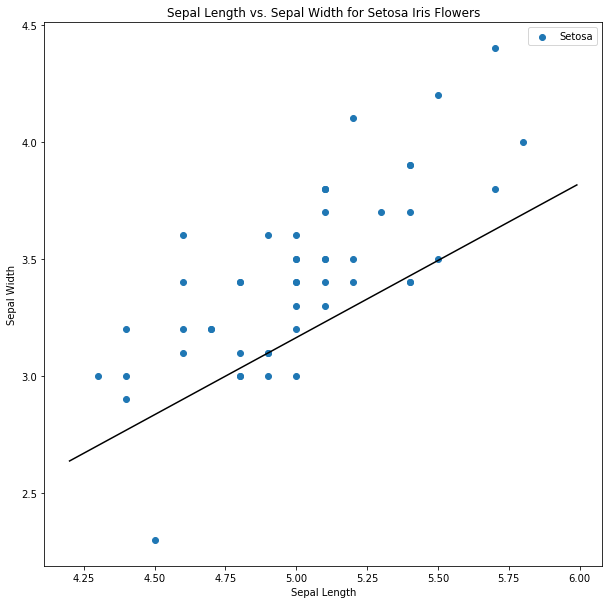

In [34]:
# Visualizing what data looks like
# We can see the data is linearly seperable
s_sl = np.array(iris['SepalLength'])
s_sw = np.array(iris['SepalWidth'])

x = np.arange(4.2, 6, .01)
y = trained_weights[0]*x + trained_weights[1]

plt.figure(figsize=(10, 10))
plt.scatter(s_sl, s_sw, label="Setosa")
plt.ylabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.title('Sepal Length vs. Sepal Width for Setosa Iris Flowers')
plt.legend()
plt.plot(x, y, color='black')

Text(0.5, 1.0, 'Slope vs. Intercept for LSR Model as the Algorithm Ran')

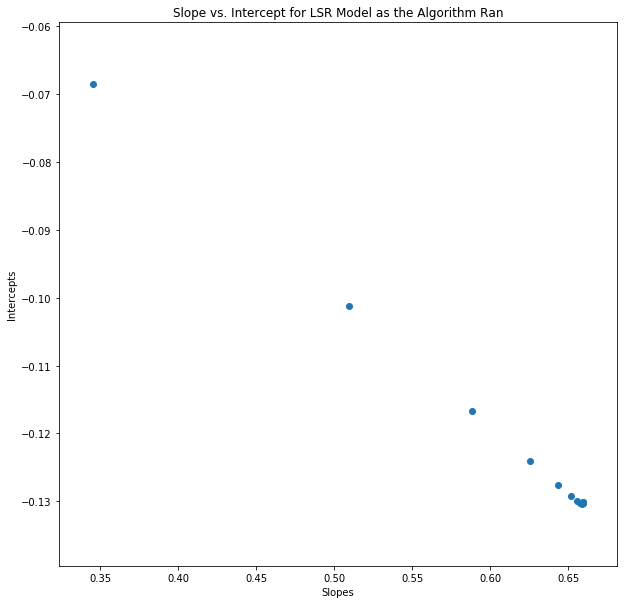

In [6]:
slopes = []
y_ints = []
for i in regression_data[1]:
    slopes.append(i[0])
    y_ints.append(i[1])
    
plt.figure(figsize=(10, 10))
plt.scatter(slopes, y_ints)
plt.ylabel('Intercepts')
plt.xlabel('Slopes')
plt.title('Slope vs. Intercept for LSR Model as the Algorithm Ran')

Text(0.5, 1.0, 'Iteration Number vs. Total Loss for LSR')

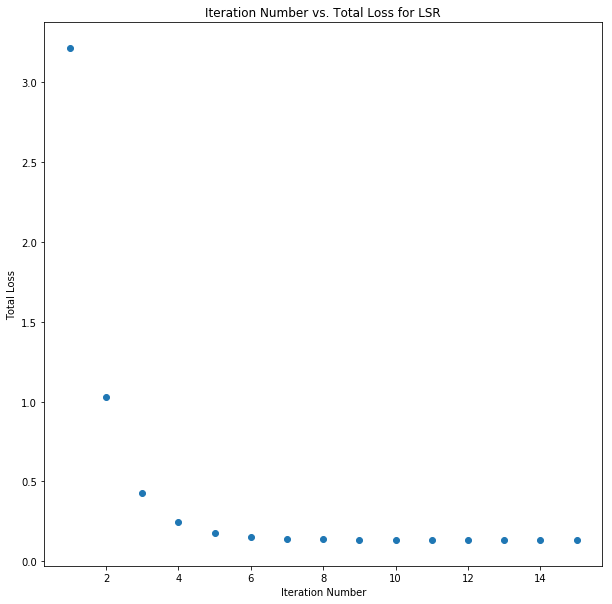

In [7]:
losses = regression_data[2]

plt.figure(figsize=(10, 10))
plt.scatter(range(1, len(losses)+1), regression_data[2])
plt.ylabel('Total Loss')
plt.xlabel('Iteration Number')
plt.title('Iteration Number vs. Total Loss for LSR')